
Final Metrics:


,Value
val_loss,0.5369
validation_binary_accuracy,0.7747
loss,0.3418
binary_accuracy,0.8590
validation_loss,0.5369
val_binary_accuracy,0.7747
test_loss,1.2173
test_accuracy,0.6173


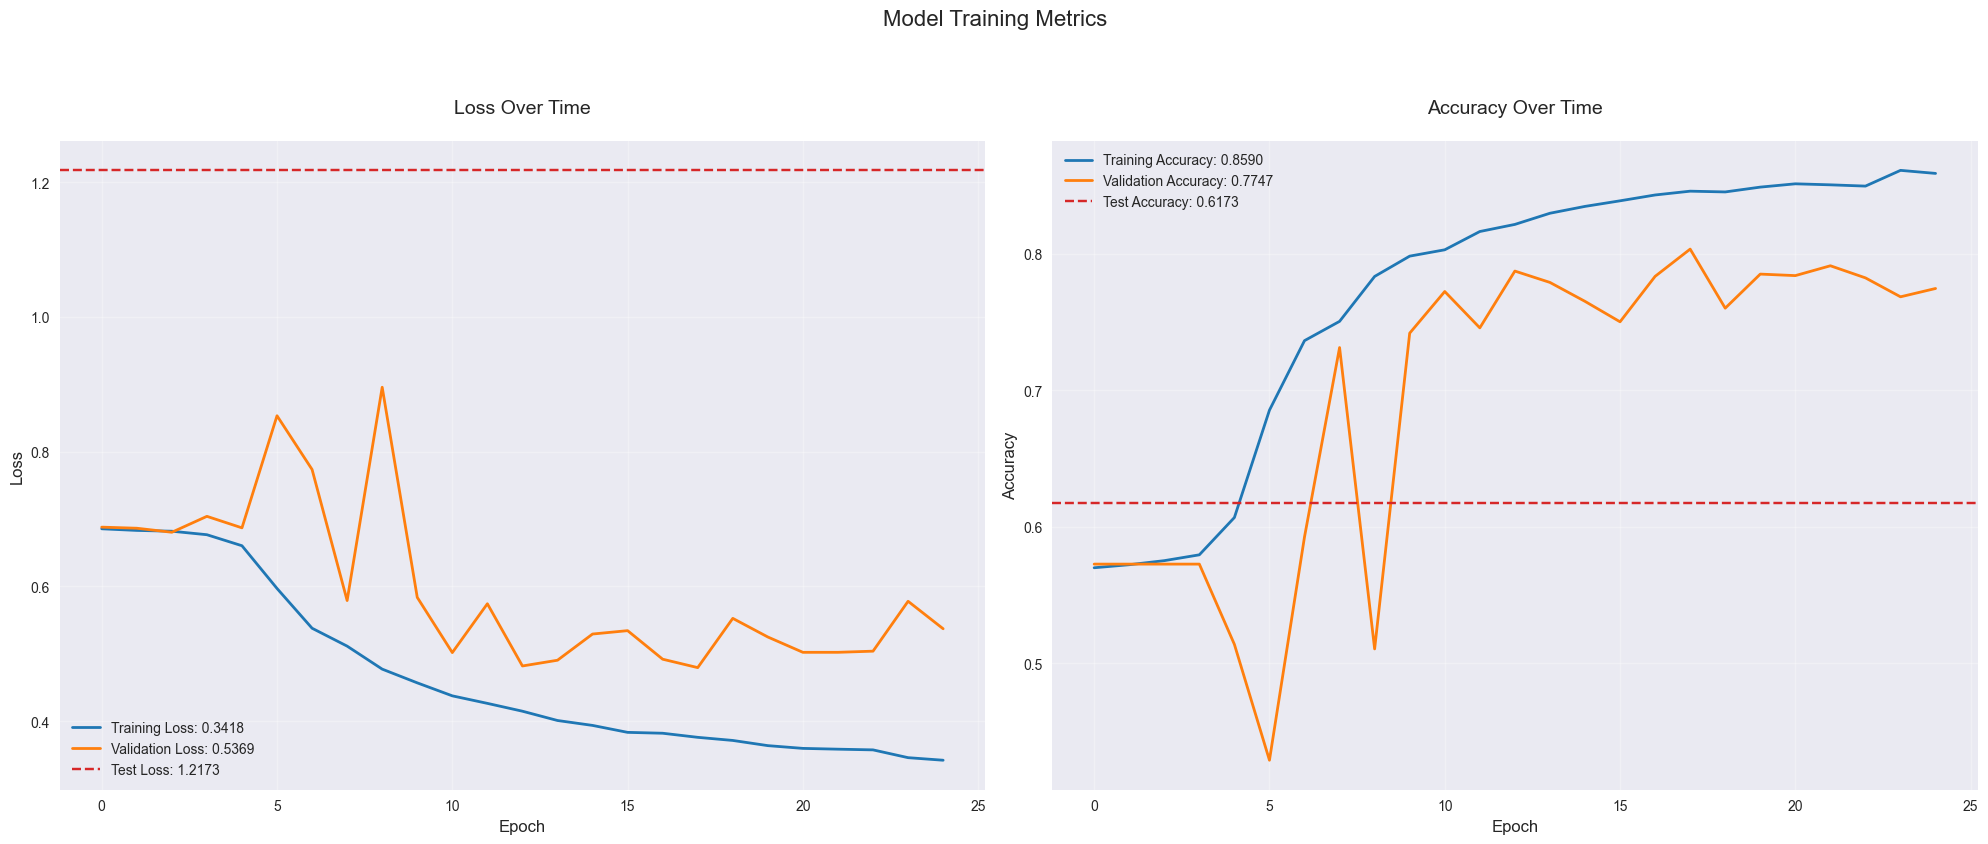

In [1]:
import mlflow
from metaflow import Flow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette(['#1f77b4', '#ff7f0e', '#d62728'])  # Blue, Orange, Red

# Connect to MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Get specific flow and run
flow = Flow('ECGSimpleTrainingFlow')
selected_run = flow['1740645002309110'] 

# Get the MLflow run ID
mlflow_run_id = selected_run.data.mlflow_run_id
run = mlflow.get_run(mlflow_run_id)

# Display final metrics with formatting
metrics = run.data.metrics
metrics_df = pd.DataFrame([metrics]).T
metrics_df.columns = ['Value']
metrics_df['Value'] = metrics_df['Value'].round(4)
print("\nFinal Metrics:")
display(metrics_df)

# Get training history
training_history = selected_run.data.train_history
history_df = pd.DataFrame(training_history)

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Model Training Metrics', fontsize=16, y=1.05)

# Get final values for legend
final_train_loss = history_df['loss'].iloc[-1]
final_val_loss = history_df['val_loss'].iloc[-1]
final_train_acc = history_df['binary_accuracy'].iloc[-1]
final_val_acc = history_df['val_binary_accuracy'].iloc[-1]

# Plot Loss
ax1.plot(history_df['loss'], color='#1f77b4', 
         label=f'Training Loss: {final_train_loss:.4f}', linewidth=2)
ax1.plot(history_df['val_loss'], color='#ff7f0e', 
         label=f'Validation Loss: {final_val_loss:.4f}', linewidth=2)
ax1.axhline(y=metrics.get('test_loss', 0), color='#d62728', linestyle='--', 
            label=f'Test Loss: {metrics.get("test_loss", 0):.4f}')
ax1.set_title('Loss Over Time', fontsize=14, pad=20)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot Accuracy
ax2.plot(history_df['binary_accuracy'], color='#1f77b4', 
         label=f'Training Accuracy: {final_train_acc:.4f}', linewidth=2)
ax2.plot(history_df['val_binary_accuracy'], color='#ff7f0e', 
         label=f'Validation Accuracy: {final_val_acc:.4f}', linewidth=2)
ax2.axhline(y=metrics.get('test_accuracy', 0), color='#d62728', linestyle='--', 
            label=f'Test Accuracy: {metrics.get("test_accuracy", 0):.4f}')
ax2.set_title('Accuracy Over Time', fontsize=14, pad=20)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# styling
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=10)
    
plt.tight_layout()
plt.show()